Create a randomly selected sample of galaxies to see where pipeline benefits start to fall short.

In [3]:
from astropy.io import fits
from astropy.table import Table
import os

In [1]:
path = '/global/homes/m/mkwiecie/desi/sv3-clustering'
file = 'BGS_BRIGHT_S_clustering.dat.fits'

In [11]:
bgs_bs = Table(fits.getdata(os.path.join(path, file)))
print(bgs_bs.colnames)

['RA', 'DEC', 'TARGETID', 'NTILE', 'TILES', 'Z', 'COMP_TILE', 'rosette_number', 'rosette_r', 'FRACZ_TILELOCID', 'BITWEIGHTS', 'PROB_OBS', 'WEIGHT_ZFAIL', 'WEIGHT', 'flux_g_dered', 'flux_r_dered', 'flux_z_dered', 'flux_w1_dered', 'flux_w2_dered', 'REST_GMR_0P1', 'KCORR_R0P1', 'KCORR_G0P1', 'KCORR_R0P0', 'KCORR_G0P0', 'REST_GMR_0P0', 'EQ_ALL_0P0', 'EQ_ALL_0P1', 'ABSMAG_R', 'NZ', 'WEIGHT_FKP']


In [15]:
bgs_bs = bgs_bs[bgs_bs['flux_r_dered'] < 25]

In [16]:
print(min(bgs_bs['flux_r_dered']))
print(max(bgs_bs['flux_r_dered']))

15.849391
24.99863


(array([4621., 4157., 3705., 3355., 3083., 2899., 2529., 2344., 2141.,
        1991.]),
 array([15.849391, 16.764315, 17.67924 , 18.594162, 19.509087, 20.424011,
        21.338934, 22.253859, 23.168783, 24.083706, 24.99863 ],
       dtype=float32),
 [<matplotlib.patches.Polygon at 0x155218d5fbe0>])

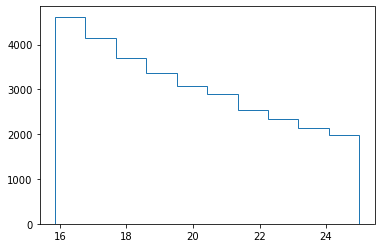

In [78]:
import matplotlib.pyplot as plt

plt.hist(bgs_bs['flux_r_dered'], histtype='step')

In [23]:
max_mag = max(bgs_bs['flux_r_dered'])
min_mag = min(bgs_bs['flux_r_dered'])

In [33]:
import numpy as np
mag_bins = np.linspace(min_mag, max_mag, round(max_mag-min_mag))

In [64]:
total_gal = 1000
gal_per_bin = round(total_gal / len(mag_bins))
print(f'{gal_per_bin=}')
print(f'{len(mag_bins)=}')

gal_per_bin=111
len(mag_bins)=9


(array([11.,  3.,  5.,  9.,  7.,  9.,  2.,  2.,  2.,  6.]),
 array([15.849408, 15.864294, 15.879179, 15.894064, 15.90895 , 15.923836,
        15.938721, 15.953606, 15.968492, 15.983377, 15.998262],
       dtype=float32),
 <BarContainer object of 10 artists>)

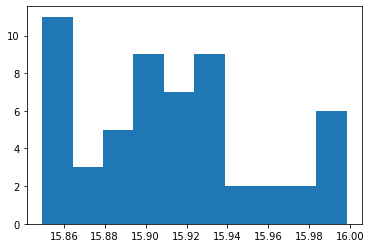

In [61]:
from sklearn.utils import resample

def resample_by_bin(min, max, bgs, n_sample):
    mask = (bgs['flux_r_dered'] >= min) & (bgs['flux_r_dered'] < max)
    bgs_cut = bgs[mask]
    ids = bgs_cut['TARGETID']
    strat = bgs_cut['flux_r_dered']

    subsample_ids = resample(ids, replace=False, n_samples=n_sample, stratify=strat)
    return bgs_cut[np.isin(bgs_cut['TARGETID'], subsample_ids)]

test = resample_by_bin(15,16, bgs_bs, 56)
plt.hist(test['flux_r_dered'])

In [67]:
resamples = []

for i in range(len(mag_bins)-1):
    resamples.append(resample_by_bin(mag_bins[i], mag_bins[i+1], bgs_bs, 111))

111
111
111
111
111
111
111
111


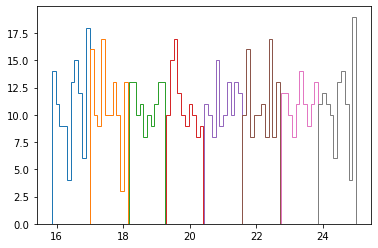

In [69]:
for s in resamples:
    print(len(s))
    plt.hist(s['flux_r_dered'], histtype='step')

In [75]:
for s in resamples:
    fname = f"subsampled_bgs_min_{min(s['flux_r_dered']):.2f}_max_{max(s['flux_r_dered']):.2f}_111.fits"
    print(fname)
    s.write('/global/homes/m/mkwiecie/desi/sv3-clustering/subsampled_bgs/'+fname, overwrite=True)

subsampled_bgs_min_15.85_max_16.99_111.fits
subsampled_bgs_min_17.00_max_18.14_111.fits
subsampled_bgs_min_18.16_max_19.27_111.fits
subsampled_bgs_min_19.29_max_20.41_111.fits
subsampled_bgs_min_20.44_max_21.57_111.fits
subsampled_bgs_min_21.57_max_22.71_111.fits
subsampled_bgs_min_22.73_max_23.85_111.fits
subsampled_bgs_min_23.86_max_25.00_111.fits
